<a href="https://colab.research.google.com/github/dniboghgnis/Tensorboard-101/blob/master/regularizersOnFlatImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,BatchNormalization
import matplotlib.pyplot as plt

In [13]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

train_labels=pd.get_dummies(data=train_labels)
test_labels=pd.get_dummies(data=test_labels)
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000, 10)


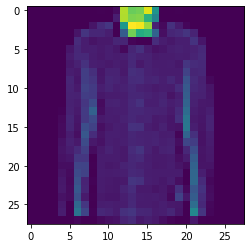

In [14]:
plt.imshow(train_images[33,:,:])
plt.show()

In [56]:
flat_model=Sequential()
flat_model.add(Flatten(input_shape=(28,28)))
flat_model.add(Dense(units=217,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),kernel_regularizer=tf.keras.regularizers.l2(),activation=tf.keras.activations.relu))
# flat_model.add(Dropout(0.3))
flat_model.add(BatchNormalization())
flat_model.add(Dense(units=10,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.01),activation=tf.keras.activations.softmax))
print(flat_model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 217)               170345    
_________________________________________________________________
batch_normalization_2 (Batch (None, 217)               868       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                2180      
Total params: 173,393
Trainable params: 172,959
Non-trainable params: 434
_________________________________________________________________
None


In [57]:
flat_model.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss=tf.keras.losses.CategoricalCrossentropy(),
                   metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.TopKCategoricalAccuracy(k=3)])

In [58]:
history=flat_model.fit(x=train_images,y=train_labels,epochs=10,batch_size=256,validation_split=0.2)

Epoch 1/10
188/188 [==============================] - 2s 10ms/step - loss: 0.8132 - categorical_accuracy: 0.7683 - top_k_categorical_accuracy: 0.9482 - val_loss: 0.4481 - val_categorical_accuracy: 0.8422 - val_top_k_categorical_accuracy: 0.9852
Epoch 2/10
188/188 [==============================] - 2s 9ms/step - loss: 0.3845 - categorical_accuracy: 0.8661 - top_k_categorical_accuracy: 0.9869 - val_loss: 0.4375 - val_categorical_accuracy: 0.8431 - val_top_k_categorical_accuracy: 0.9870
Epoch 3/10
188/188 [==============================] - 2s 9ms/step - loss: 0.3347 - categorical_accuracy: 0.8820 - top_k_categorical_accuracy: 0.9893 - val_loss: 0.3990 - val_categorical_accuracy: 0.8588 - val_top_k_categorical_accuracy: 0.9858
Epoch 4/10
188/188 [==============================] - 2s 9ms/step - loss: 0.3172 - categorical_accuracy: 0.8883 - top_k_categorical_accuracy: 0.9895 - val_loss: 0.4044 - val_categorical_accuracy: 0.8569 - val_top_k_categorical_accuracy: 0.9874
Epoch 5/10
188/188 [===

In [47]:
print(history.history.keys())
print(history.history['loss'])

dict_keys(['loss', 'categorical_accuracy', 'top_k_categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'val_top_k_categorical_accuracy'])
[5.254781723022461, 1.3834656476974487, 1.0990241765975952, 1.0169075727462769, 0.9604368209838867, 1.0846246480941772, 1.0282232761383057, 1.001705288887024, 1.0937422513961792, 1.920672059059143]


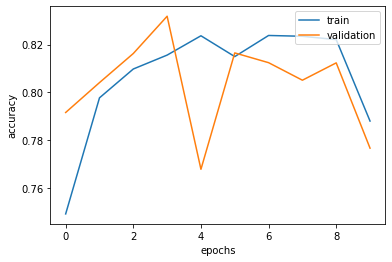

In [49]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='upper right')